# Big Data Project SoSe 2020

# Participants:
1. Mayank Singh (219100909) (mayank@uni-koblenz.de)
2. Riya Dharmesh Damani (219203199) (riyadamani@uni-koblenz.de)

Link of the video :-https://drive.google.com/file/d/1eEa617pV4DFf9nnLFmaA06kbWY6Hsax_/view?usp=sharing

In [1]:
import findspark

findspark.init()

In [2]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select 'spark' as hello ")

df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [3]:
co2data=spark.read.option("inferSchema","true").option("header","true").csv("C:/co2.csv")

In [4]:
from pyspark.sql.functions import col

In [5]:
cols = ['Country Name','Country Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']

co2data=co2data.select(*cols)

In [6]:

co2data=co2data.na.drop()

In [7]:
co2data=co2data.withColumn('diff', col('2014')-col('2004'))
co2data.show(1)

+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------------+
|Country Name|Country Code|       2004|       2005|       2006|       2007|       2008|       2009|       2010|       2011|       2012|       2013|       2014|               diff|
+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------------+
|       Aruba|         ABW|26.51729342|27.20070778|26.94772597|27.89502282|26.22955267|25.91532206|24.67052887|24.50751622|13.15772231|8.353561008|8.410064178|-18.107229242000003|
+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------------+
only showing top 1 row



In [8]:
#from  pyspark.sql.functions import abs
#co2data = co2data.withColumn('Absolute_Value', abs(co2data.diff))

In [9]:
#co2data.show(1)

In [10]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

In [11]:
vecAssembler = VectorAssembler(inputCols=['diff'], outputCol="features")
co2data = vecAssembler.transform(co2data)
co2data.show(5)

+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------------+--------------------+
|Country Name|Country Code|       2004|       2005|       2006|       2007|       2008|       2009|       2010|       2011|       2012|       2013|       2014|               diff|            features|
+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------------+--------------------+
|       Aruba|         ABW|26.51729342|27.20070778|26.94772597|27.89502282|26.22955267|25.91532206|24.67052887|24.50751622|13.15772231|8.353561008|8.410064178|-18.107229242000003|[-18.107229242000...|
| Afghanistan|         AFG|0.038410043|0.051743965|0.062427532|0.083892806|0.151720912|0.238398541| 0.28998763|0.406424217|0.345148783|0.310341015|0.293946407|        0.255536364|       [0.2555363

In [12]:
kmeans = KMeans().setK(7).setSeed(1)
model = kmeans.fit(co2data.select('features'))

In [13]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.29372965]
[-15.62774759]
[2.60436218]
[-3.7487456]
[8.18809159]
[-1.83748401]
[-0.795336]


In [14]:
co2data = model.transform(co2data)
co2data.show(25)

+--------------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------+--------------------+----------+
|        Country Name|Country Code|       2004|       2005|       2006|       2007|       2008|       2009|       2010|       2011|       2012|       2013|       2014|                diff|            features|prediction|
+--------------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------+--------------------+----------+
|               Aruba|         ABW|26.51729342|27.20070778|26.94772597|27.89502282|26.22955267|25.91532206|24.67052887|24.50751622|13.15772231|8.353561008|8.410064178| -18.107229242000003|[-18.107229242000...|         1|
|         Afghanistan|         AFG|0.038410043|0.051743965|0.062427532|0.083892806|0.151720912|0.238398541| 0.289987

In [15]:
import pandas
co2datapd=co2data.toPandas()

In [16]:
print(co2datapd)

                                          Country Name Country Code  \
0                                                Aruba          ABW   
1                                          Afghanistan          AFG   
2                                               Angola          AGO   
3                                              Albania          ALB   
4                                              Andorra          AND   
5                                           Arab World          ARB   
6                                 United Arab Emirates          ARE   
7                                            Argentina          ARG   
8                                              Armenia          ARM   
9                                  Antigua and Barbuda          ATG   
10                                           Australia          AUS   
11                                             Austria          AUT   
12                                          Azerbaijan          AZE   
13    

In [17]:
import geopandas
import geoplot

In [18]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
country_shapes = world[['geometry', 'iso_a3']]

In [19]:
print(country_shapes)

                                              geometry iso_a3
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    FJI
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...    TZA
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...    ESH
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...    CAN
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...    USA
5    POLYGON ((87.35997 49.21498, 86.59878 48.54918...    KAZ
6    POLYGON ((55.96819 41.30864, 55.92892 44.99586...    UZB
7    MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...    PNG
8    MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...    IDN
9    MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...    ARG
10   MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...    CHL
11   POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...    COD
12   POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...    SOM
13   POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...    KEN
14   POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...    SDN
15   POL

In [20]:
import matplotlib.pyplot as plt
plotdf=geopandas.GeoDataFrame(pandas.merge(co2datapd,country_shapes, left_on='Country Code', right_on='iso_a3'))

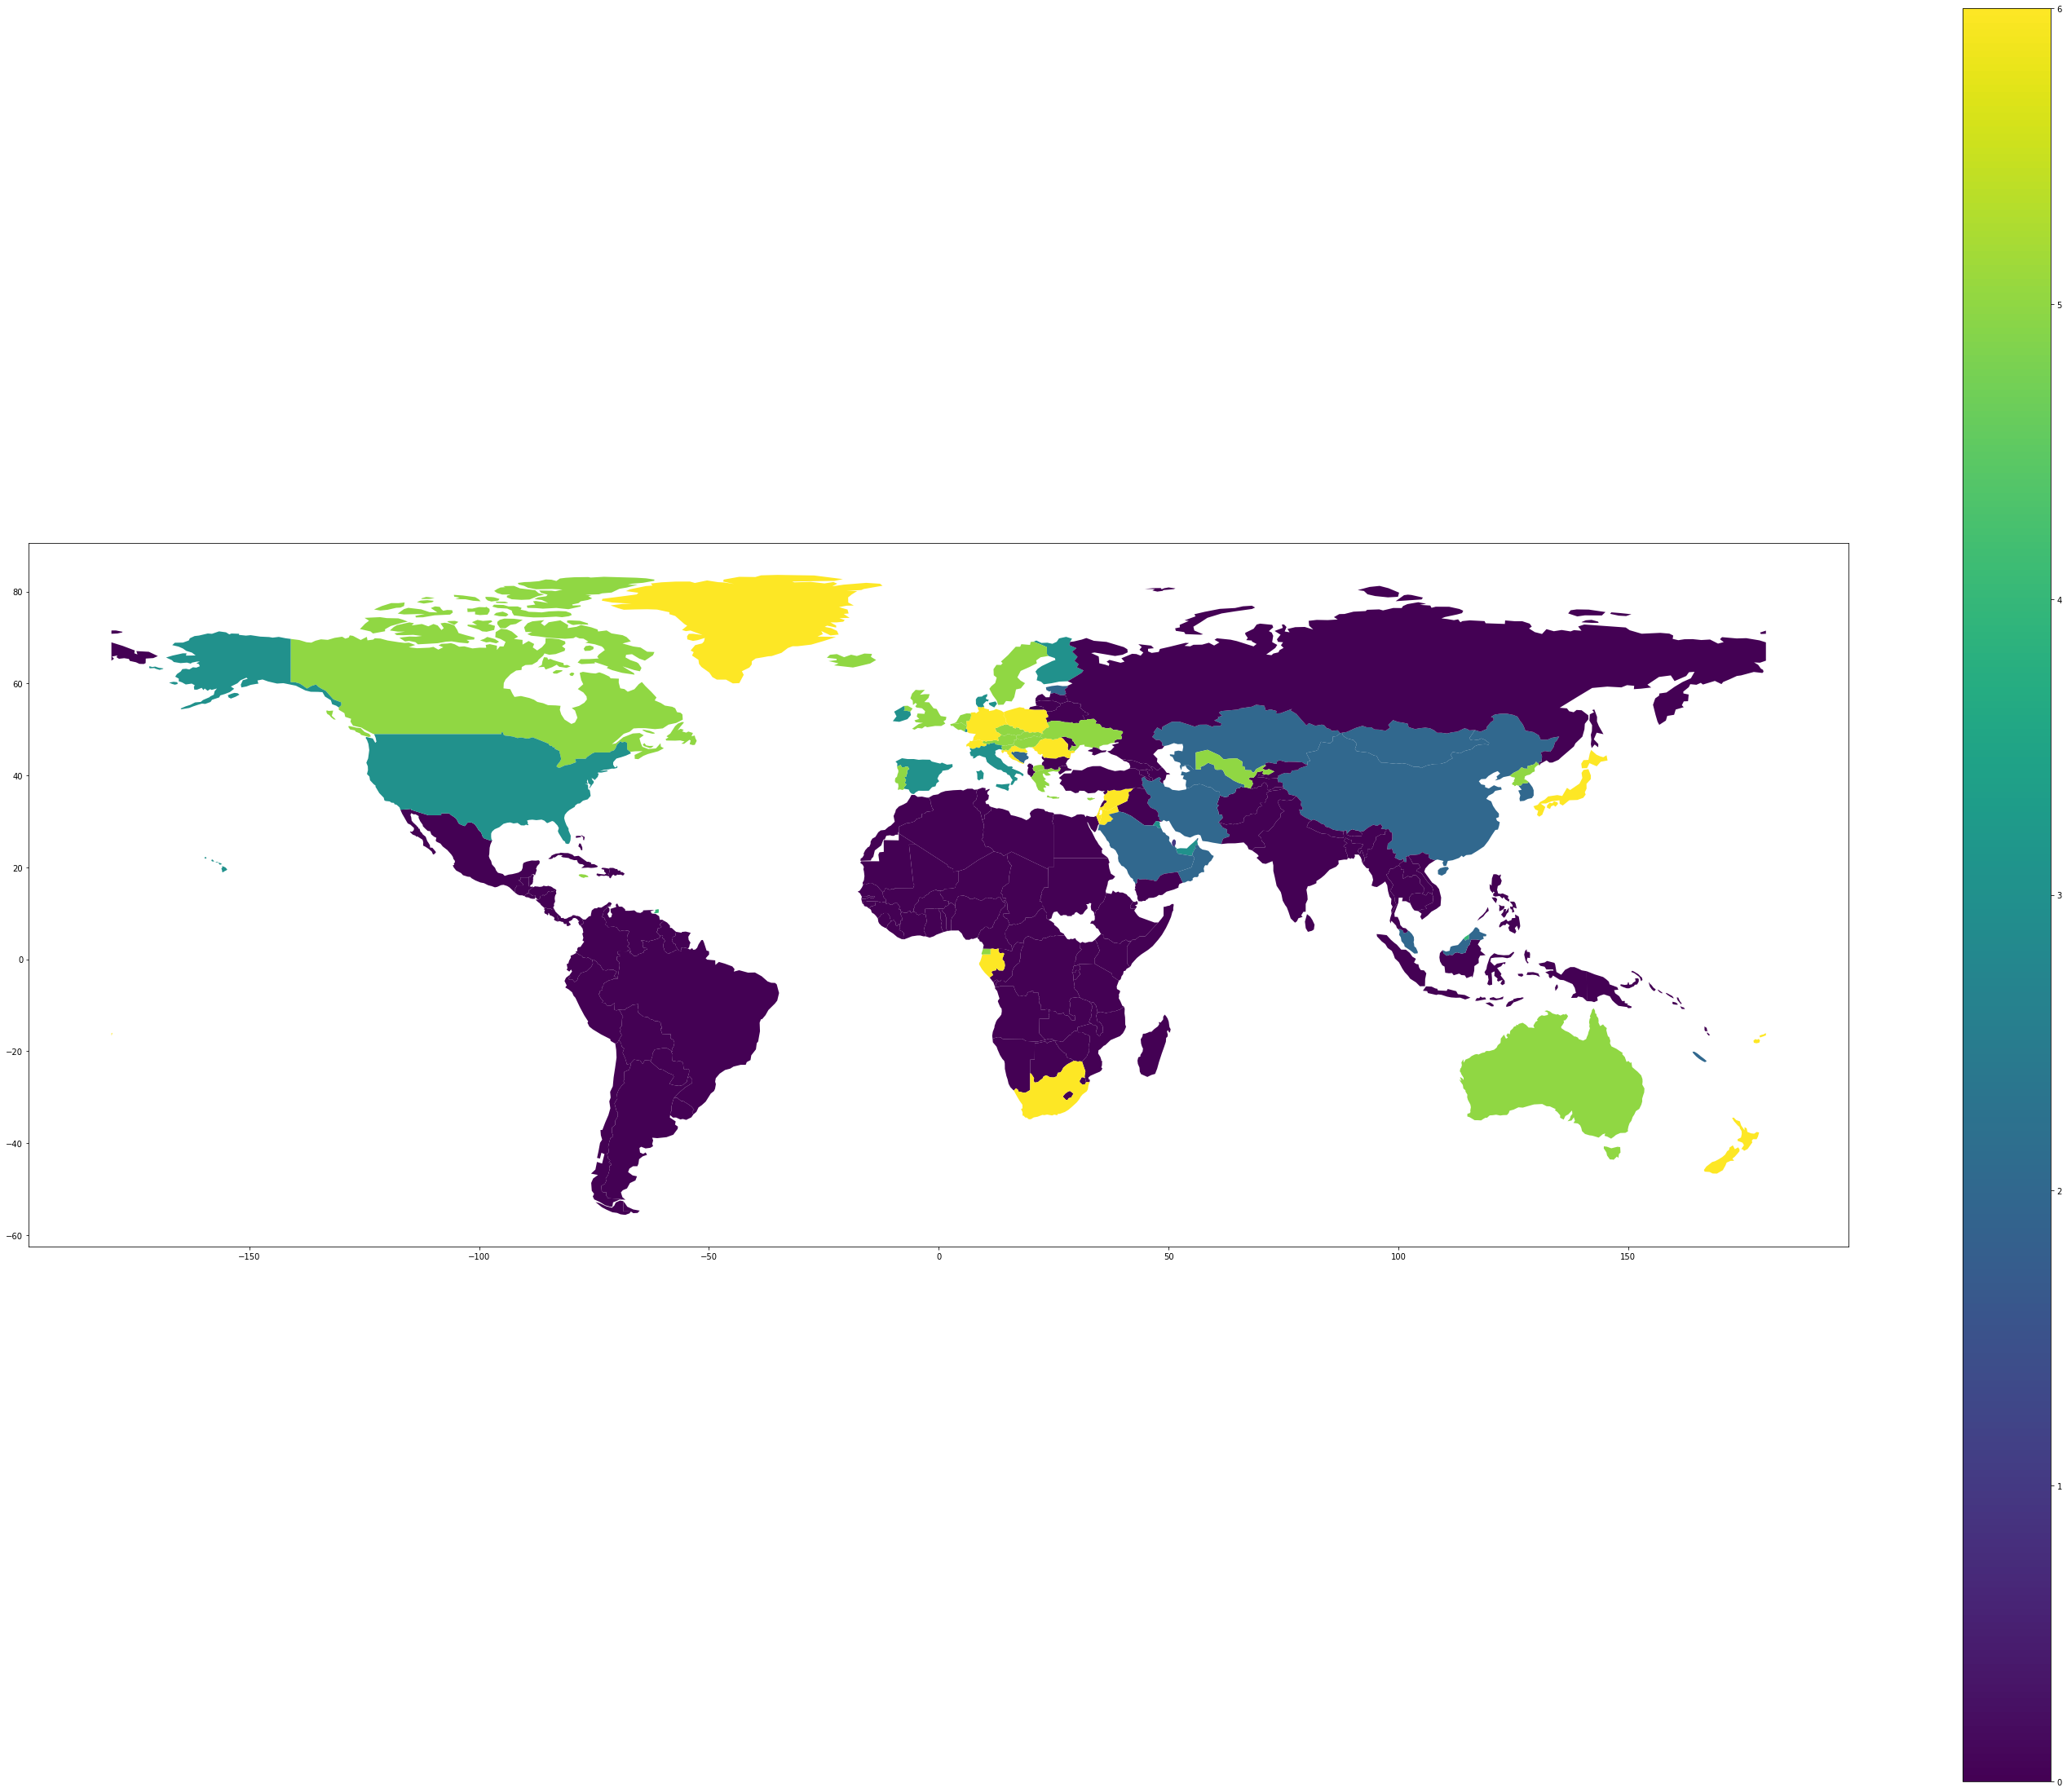

In [21]:
plotdf.plot(column='prediction',figsize=(50,40), legend=True)

In [22]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Cluster Centers: 
[0.29372965]
[-15.62774759]
[2.60436218]
[-3.7487456]
[8.18809159]
[-1.83748401]
[-0.795336]


In [23]:
x=co2data.filter(col("prediction") == "1")
print(x.show(4))

+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------------+--------------------+----------+
|Country Name|Country Code|       2004|       2005|       2006|       2007|       2008|       2009|       2010|       2011|       2012|       2013|       2014|               diff|            features|prediction|
+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------------+--------------------+----------+
|       Aruba|         ABW|26.51729342|27.20070778|26.94772597|27.89502282|26.22955267|25.91532206|24.67052887|24.50751622|13.15772231|8.353561008|8.410064178|-18.107229242000003|[-18.107229242000...|         1|
|       Qatar|         QAT|57.00557389|58.88108378|62.06618488|51.93367224|45.13478159|41.82722076|39.05970823|39.50920515|42.86037538|36.38791752|43.85

In [24]:
x=co2data.filter(col("prediction") == "4")
print(x.show(4))

+-------------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------------+-------------------+----------+
|       Country Name|Country Code|       2004|       2005|       2006|       2007|       2008|       2009|       2010|       2011|       2012|       2013|       2014|             diff|           features|prediction|
+-------------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------------+-------------------+----------+
|  Brunei Darussalam|         BRN|13.90557072|13.70929354|13.13240048|22.44413479|24.03617354|20.47909645|21.10681443|24.62749182|24.22676314|19.29518002| 22.2291779|       8.32360718|       [8.32360718]|         4|
|Trinidad and Tobago|         TTO|25.91383845| 29.4264629|32.76356808|34.75442871|33.76743457|33.98747928|36.09165552|35.12550948|33.773